## PyTorch is, at its core, a Python library enabling GPU-accelerated tensor computation, similar to NumPy. On top of this, PyTorch provides a rich API for neural network applications.

PyTorch deviates from the basic intuition of programming in Python in one particular way: it records the execution of the running program. That is, PyTorch will silently “spy” on the operations you perform on its datatypes and, behind the scenes, construct – again – a computation graph. This computation graph is required for automatic differentiation, as it must walk the chain of operations that produced a value backwards in order to compute derivatives (for reverse mode AD). The way this computation graph, or rather the process of assembling this computation graph, differs notably from TensorFlow or MXNet, is that a new graph is constructed eagerly, on the fly, each time a fragment of code is evaluated. Conversely, in Tensorflow, a computation graph is constructed only once, by the metaprogram that is your code. Furthermore, while PyTorch will actually walk the graph backwards dynamically each time you ask for the derivative of a value, TensorFlow will simply inject additional nodes into the graph that (implicitly) calculate this derivative and are evaluated like all other nodes. This is where the distinction between dynamic and static graphs is most apparent.

In [3]:
import torch #import torch
from torch import nn
import numpy as np
import torchvision
import torchvision.transforms as transforms

In practice, one will most often want to use one of PyTorch’s functions that return tensors initialized in a certain manner, such as:

    torch.rand: values initialized from a random uniform distribution,
    torch.randn: values initialized from a random normal distribution,
    torch.eye(n): an n×n identity matrix,
    torch.from_numpy(ndarray): a PyTorch tensor from a NumPy ndarray,
    torch.linspace(start, end, steps): a 1-D tensor with steps values spaced linearly between start and end,
    torch.ones : a tensor with ones everywhere,
    torch.zeros_like(other) : a tensor with the same shape as other and zeros everywhere,
    torch.arange(start, end, step): a 1-D tensor with values filled from a range.

In [4]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    
# Compute gradients.
y.backward()
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 


tensor(2.)
tensor(1.)
tensor(1.)


##### Autograd has multiple goals:

    * provide automatic differentiation of Torch expressions
    * support arbitrary Torch types (e.g. transparent and full support for CUDA-backed computations)
    * Full integration with nn modules: mix and match auto-differentiation with user-provided gradients
    * the ability to define any new nn compliant Module with automatic differentiation
    * represent complex evaluation graphs, which is very useful to describe models with multiple loss functions and/or inputs
    * graphs are dynamic, i.e. can be different at each function call: for loops, or conditional, can depend on intermediate results, or on input parameters
    * enable gradients of gradients for transparent computation of Hessians


In [5]:
x = torch.randn(20, 3)
y = torch.randn(20,2)
linear = nn.Linear(3,2)
print(linear.weight, linear.bias)

Parameter containing:
tensor([[-0.0027,  0.1648,  0.2773],
        [ 0.4063,  0.3274, -0.0313]], requires_grad=True) Parameter containing:
tensor([-0.0409,  0.0748], requires_grad=True)


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.001)

In [7]:
pred = linear(x)

In [8]:
loss = criterion(pred, y)

In [9]:
print("Loss:",loss.item())

Loss: 1.0895366668701172


In [10]:
loss.backward()

In [11]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[0.0436, 0.6069, 0.2862],
        [0.1520, 0.1497, 0.4191]])
dL/db:  tensor([-0.3898, -0.0415])


In [12]:
x = np.array([[1,2],[3,4]])
y =torch.from_numpy(x)
z = y.numpy()

In [13]:
print(x)
print(y)
print(z)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [14]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)


In [15]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ../../data/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

### The output of torchvision datasets are PILImage images of range [0, 1].

In [16]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4,
                                          shuffle=True, num_workers=2)

In [20]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

In [35]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [21]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

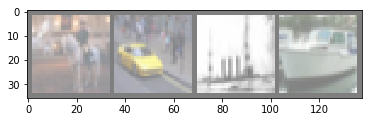

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels


In [24]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

horse   car  ship  ship


In [25]:
import torch.nn.functional as F

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
        
        

In [47]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [49]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: Expected object of type torch.FloatTensor but found type torch.cuda.FloatTensor for argument #2 'weight'

GroundTruth:    cat  ship  ship plane


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f3776aee908>>
Traceback (most recent call last):
  File "/home/infy/miniconda2/envs/torch-gpu/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/infy/miniconda2/envs/torch-gpu/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/infy/miniconda2/envs/torch-gpu/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/infy/miniconda2/envs/torch-gpu/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/infy/miniconda2/envs/torch-gpu/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/infy/mi

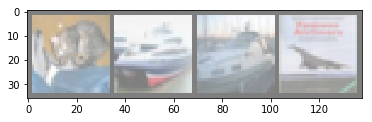

In [36]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [37]:
outputs = net(images)

In [38]:
outputs

tensor([[-0.3854, -1.8253,  0.5400,  2.0088,  0.6317,  1.5801, -0.0745, -0.7870,
          0.0375, -2.0810],
        [ 4.0769,  4.3053, -0.9216, -3.2215, -1.4034, -4.4087, -4.0236, -2.1432,
          3.7596,  3.8525],
        [ 2.1173,  2.1701, -0.6790, -1.1778, -1.2596, -2.3937, -2.1201, -2.3467,
          3.6808,  1.8967],
        [ 2.3960, -0.5504,  0.6099, -1.1441,  1.3993, -1.9596, -1.7081, -1.2521,
          2.4139, -0.6797]], grad_fn=<ThAddmmBackward>)

In [41]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship  ship


In [42]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %


In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


In [44]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [45]:
inputs, labels = inputs.to(device), labels.to(device)